In [ ]:
# Ejercicio: Predicción de la Velocidad de Enfriamiento de un Líquido
Descripción:
Imagina que estás estudiando el proceso de enfriamiento de un líquido caliente que se deja a temperatura ambiente. Se registran las temperaturas del líquido en varios momentos y el objetivo es modelar cómo cambia la temperatura con el tiempo usando regresión polinómica.

Los datos se encuentran en una tabla con las siguientes columnas:


| tiempo (s) | temperatura (°C) |
|------------|------------------|
| 0          | 80               |
| 3          | 68               |
| 5          | 55               |
| 8          | 48               |
| 12         | 41               |
| 16         | 38               |
| 20         | 34               |
| 25         | 30               |
| 30         | 28               |

In [3]:
# libreria

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


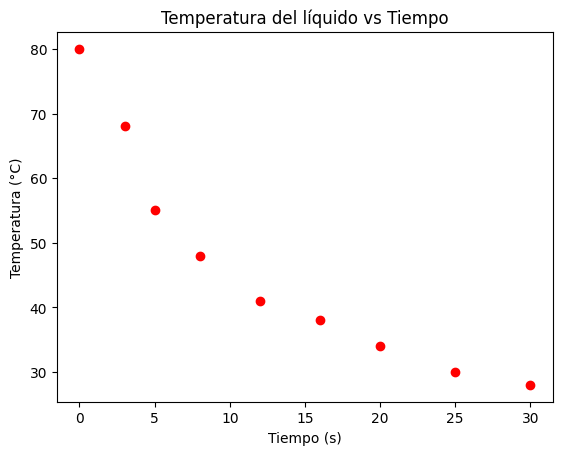

In [2]:
# datos
tiempo = np.array([0, 3, 5, 8, 12, 16, 20, 25, 30]).reshape(-1, 1)
temperatura = np.array([80, 68, 55, 48, 41, 38, 34, 30, 28])

# graficar

plt.scatter(tiempo, temperatura, color='red')
plt.title('Temperatura del líquido vs Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.show()


In [5]:
# dividir los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(tiempo, temperatura, test_size=0.2, random_state=42)


In [23]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [24]:
modelo = LinearRegression()
modelo.fit(X_train_poly, y_train)

LinearRegression()

In [25]:
y_pred_train = modelo.predict(X_train_poly)
y_pred_test = modelo.predict(X_test_poly)

In [26]:
# Evaluamos el modelo
print("Error cuadrático medio (RMSE) en entrenamiento:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Error cuadrático medio (RMSE) en prueba:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R² en prueba:", r2_score(y_test, y_pred_test))

Error cuadrático medio (RMSE) en entrenamiento: 3.0615484468593994
Error cuadrático medio (RMSE) en prueba: 2.0428720489632104
R² en prueba: 0.9884395395888224


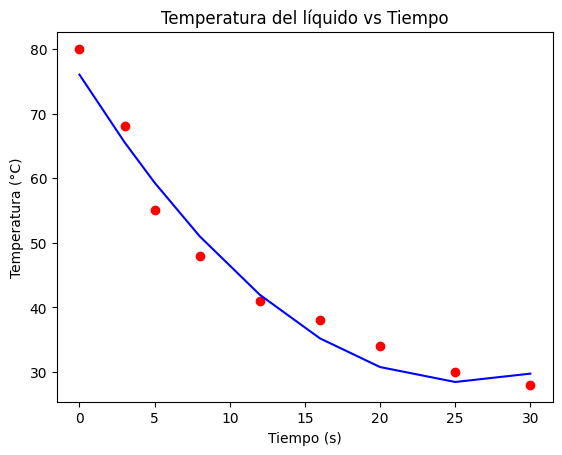

In [27]:
# Graficamos el modelo

plt.scatter(tiempo, temperatura, color='red')
plt.plot(tiempo, modelo.predict(poly.transform(tiempo)), color='blue')
plt.title('Temperatura del líquido vs Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.show()

In [28]:
# Predicción
tiempo_pred = np.array([[10]])
temperatura_pred = modelo.predict(poly.transform(tiempo_pred))

print(f"La temperatura del líquido a los {tiempo_pred[0][0]} segundos es de {temperatura_pred[0]:.2f} °C")

La temperatura del líquido a los 10 segundos es de 46.19 °C
